Dataset: Abalone <br>
Obtained from: UCI Repository (https://archive.ics.uci.edu/dataset/1/abalone)

#### Parameters
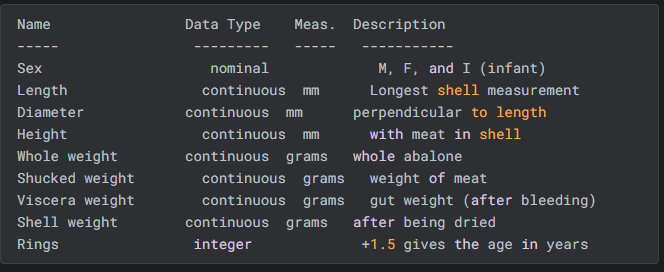

# Regression Model

In [ ]:
# Importing pandas library and aliasing it as pd
import pandas as pd

# Importing numpy library and aliasing it as np
import numpy as np

# Importing seaborn library and aliasing it as sns
import seaborn as sns

# Importing matplotlib.pyplot module from matplotlib library and aliasing it as plt
import matplotlib.pyplot as plt

# Importing stats module from scipy library and aliasing it as stats
import scipy.stats as stats

# Import the statsmodels library
import statsmodels.api as sm

# Importing fetch_ucirepo function from ucimlrepo module
from ucimlrepo import fetch_ucirepo 

# Importing required regression models from scikit-learn library
from sklearn.linear_model import  Ridge

# Importing train_test_split function from model_selection module in scikit-learn
from sklearn.model_selection import train_test_split

# Importing metrics module from scikit-learn
from sklearn import metrics

# Importing OneHotEncoder class and StandardScaler class from preprocessing module in scikit-learn
from sklearn.preprocessing import   StandardScaler 

# Importing Pipeline class from pipeline module in scikit-learn
from sklearn.pipeline import Pipeline 

# Importing ColumnTransformer class from compose module in scikit-learn
from sklearn.compose import ColumnTransformer

# Importing CatBoost and CatBoostRegressor classes from catboost library
from catboost import CatBoost , CatBoostRegressor

# Import GridSearchCV from scikit-learn
from sklearn.model_selection import GridSearchCV

# Set the seaborn theme to 'darkgrid'
sns.set_theme(style='darkgrid')

# Set the context of the seaborn plots to 'paper'
sns.set_context("paper")

In [ ]:
# fetch dataset from UCI database
heart_attack = fetch_ucirepo(id=1)

#Read the original dataset into a pandas dataframe
df = heart_attack.data.original

In [ ]:
#View general informaiton of the dataset
df.info()

In [ ]:
#View the first 5 rows of the dataset
df.head()

In [ ]:
#Checking if there are any null values with iunt dataset
df.isnull().sum()

In [ ]:
# Calculate the total weight by summing the Shell_weight, Shucked_weight, and Viscera_weight columns
df['Total_weight'] = df['Shell_weight'] + df['Shucked_weight'] + df['Viscera_weight']

In [ ]:
# Calculate the missing weight by subtracting the Total_weight from the Whole_weight
df['missing_weight'] = (df['Whole_weight'] - df['Total_weight'])

# Drop the Total_weight column as it was used only for intermediate calculations
df.drop(['Total_weight'], axis=1, inplace=True)

In [ ]:
df.head()

## Data Quality

In [ ]:
# Select numerical columns from the DataFrame
num_cols = df.select_dtypes('number').columns

In [ ]:
# Create subplots with 3 rows and 3 columns, and set the overall figure size
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(9, 11))

# Set the title for the entire figure
plt.suptitle('Kernel Density Estimates for Various Features', fontsize=16)

# Iterate over numerical columns and plot kernel density estimates for each column
for i, col in enumerate(num_cols, 0):
    # Set the subplot position
    plt.subplot(3, 3, i+1)
    
    # Plot the kernel density estimate for the current column
    sns.kdeplot(df[col], color='orange', fill=True)

# Adjust the layout of subplots to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
from scipy.stats import pearsonr

# Create subplots with 2 rows and 4 columns, and set the overall figure size
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(14, 14))

# Set the title for the entire figure
plt.suptitle('Correlation and Association between Features and Target', fontsize=16)

# Iterate over numerical columns except 'Rings' and plot regression plots with correlation coefficients
for i, col in enumerate(num_cols.drop('Rings'), 0):
    # Set the subplot position
    plt.subplot(2, 4, i + 1)
    
    # Plot the regression plot between 'Rings' and the current column
    sns.scatterplot(y=df['Rings'], x=df[col],
                color='maroon')
               # scatter_kws={'s': 6},
                #ci=False, 
                #order=False)

    # Calculate Pearson correlation coefficient
    corr_coef, _ = pearsonr(df[col], df['Rings'])
    
    # Set x-label, y-label, and title with Pearson correlation coefficient
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Rings', fontsize=12)
    plt.title(f'Pearson Corr: {corr_coef:.2f}', fontsize=12)
    
    # Set font size for x-axis and y-axis ticks
    plt.tick_params(axis='x', which='both', labelsize=12)
    plt.tick_params(axis='y', which='both', labelsize=12)

# Adjust the layout of subplots to prevent overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display the plot
plt.show()


## Insert a method or whatever that shows heights were found to be 0

In [ ]:
df['Height'].replace(0 , df['Height'].median(),inplace= True)

In [ ]:
sns.heatmap(df[num_cols].corr() , annot= True )

In [ ]:
# Create new binary columns for each category in the 'Sex' column
# Convert 'Sex' column to binary indicators: 1 for the respective category, 0 otherwise
df['Sex_M'] = (df['Sex'] == "M").astype(int)  # 1 if male, 0 otherwise
df['Sex_F'] = (df['Sex'] == "F").astype(int)  # 1 if female, 0 otherwise
df['Sex_I'] = (df['Sex'] == "I").astype(int)  # 1 if infant, 0 otherwise

# Drop the original 'Sex' column as it is now represented by the binary indicator columns
df.drop('Sex', axis=1, inplace=True)

In [ ]:
# Remove the target variable 'Rings' from the list of numerical columns
num_cols = num_cols.drop('Rings')

In [ ]:
# Add a constant term to the features matrix for Ordinary Least Squares (OLS) regression
X_ols = sm.add_constant(df.drop(['Rings'], axis=1))
y_ols = df['Rings']  # Define the target variable

# Fit an Ordinary Least Squares (OLS) linear model
model_ols = sm.OLS(y_ols, X_ols).fit()

# Display the summary of the OLS linear model
print("OLS Linear Model Summary:")
print(model_ols.summary())

# Extract p-values for each feature in the OLS linear model
p_values_ols = model_ols.pvalues
print("\nP-values for each feature in OLS Linear Model:")
print(p_values_ols)

In [ ]:
def GetPipeline(algo , num_cols ):
    
    #Defining a pipeline for the numrical columns
    numeric_transformer = Pipeline(steps=[
        #Scales the data to zero mean and unit variance
       ('scaler', StandardScaler())])
    #Defining a pipeline for the numrical columns

    # Combine the numeric and categorical transformers using a ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            # Apply the numeric pipeline to numeric columns
            ('num', numeric_transformer, num_cols)
         ]
            )


    model = Pipeline(steps=[
        # Preprocess the data using the combined transformer
        ('preprocessor', preprocessor),
        
        # Apply the specified Regression algorithm
        ('regression', algo) 
    ])

    
    return model 

## Creating Baseline Model

In [ ]:
# Splitting the data into features and target variable
features = df.drop(['Rings', 'Length'], axis=1)  # Features without 'Rings' and 'Length' columns
target = df['Rings']  # Target variable 'Rings'

In [ ]:
# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, train_size=0.7, random_state=42)


In [ ]:
# Define a function to print evaluation metrics
def print_evaluate(true, predicted, x_train): 
    # Calculate evaluation metrics
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    
    # Calculate adjusted R-squared
    n = len(x_train)
    p = x_train.shape[1]
    r2_adjusted = 1 - ((1 - r2_square) * (n - 1) / (n - p - 1))
    
    # Print evaluation metrics
    print('Test set evaluation:\n_____________________________________')
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square:', r2_square)
    print('R2 Adjusted:', r2_adjusted)

In [ ]:
# Selecting numerical columns (excluding the target variable 'Rings')
num_cols = num_cols[1:]

# Instantiate a baseline model pipeline with Ridge regression
baseline = GetPipeline(Ridge(), num_cols)  # Assuming GetPipeline is a custom function
baseline.fit(x_train, y_train)  # Fit the baseline model
y_predict = baseline.predict(x_test)  # Predict the target variable on the test set
print_evaluate(y_test, y_predict, x_train)  # Print evaluation metrics

### 1. Does Removing Outliers improve our mode?

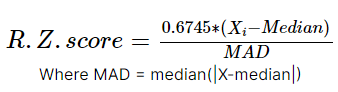

In [ ]:
# Define a function to detect and remove outliers using the Median Absolute Deviation (MAD) method
def robust_outliers(col):
    median = np.median(col)  # Calculate the median of the column
    MAD = stats.median_abs_deviation(col)  # Calculate the Median Absolute Deviation (MAD) of the column
    outliers_indices = []  # Initialize a list to store indices of outliers

    # Iterate over values in the column
    for i, value in enumerate(col):
        z = (0.6745 * (value - median) / MAD)  # Calculate the z-score using MAD
        if np.abs(z) > 3:  # Check if the absolute z-score is greater than 3 (indicating an outlier)
            outliers_indices.append(i)  # If yes, add the index of the outlier to the list

    return outliers_indices  # Return the list of indices of outliers

# Create a copy of the DataFrame to preserve the original data
no_out_df = df.copy()

# Iterate over numerical columns and remove outliers using the robust_outliers function
for col in num_cols:
    outliers = robust_outliers(no_out_df[col])  # Detect outliers in the current column
    no_out_df = no_out_df.drop(outliers, axis=0).reset_index(drop=True)  # Remove outliers and reset index


In [ ]:
# Create subplots for kernel density estimates of features without outliers
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(9, 11))
plt.suptitle('Kernel Density Estimates for Various Features', fontsize=16)

# Plot kernel density estimates for each numerical column in the DataFrame without outliers
for i, col in enumerate(num_cols, 0):
    plt.subplot(3, 3, i + 1)
    sns.kdeplot(no_out_df[col], color='orange', fill=True)

# Hide the bottom-right subplot to adjust layout
ax[2, 1].set_visible(False)
ax[2, 2].set_visible(False)

# Adjust the layout of subplots to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
# Define the features and target variable after removing outliers
features_out = no_out_df.drop(['Rings', 'Length'], axis=1)  # Features without 'Rings' and 'Length' columns
target_out = no_out_df['Rings']  # Target variable 'Rings'

# Split the data into training and testing sets
x_train_out, x_test_out, y_train_out, y_test_out = train_test_split(features_out, target_out, train_size=0.7, random_state=42)

In [ ]:
# Instantiate a pipeline with Ridge regression model for the training data without outliers
rf = GetPipeline(Ridge(), num_cols[1:])  # Assuming GetPipeline is a custom function
rf.fit(x_train_out, y_train_out)  # Fit the model
y_predict = rf.predict(x_test_out)  # Predict the target variable on the test set
print_evaluate(y_test_out, y_predict, x_train_out)  # Print evaluation metrics

## Does our model fit a linear model based on the 4 assumptions

In [ ]:
# Calculate the errors between the actual and predicted values
errors = y_test_out - y_predict

# Create a distribution plot of the errors
sns.displot(errors, kde=True)
plt.show()

# Create a scatter plot of predicted values vs. errors
sns.scatterplot(x=y_predict, y=errors)
sns.lineplot(x=[3, 20], y=[0, 0], color='blue')  # Add a horizontal line at y=0

A Linear model makes 4 assumption: and it has failed to have residuals of constant variance throughtout, homoscadeicty , the independeant variables are highly correlated and the features are mostly non-linearly correalted to the dependent variable

## Will a non-linear model produce a better model

In [ ]:
# Instantiate a CatBoostRegressor model with evaluation metric set to RMSE
cbr = CatBoostRegressor(eval_metric='RMSE')

# Train the CatBoostRegressor model
cbr.fit(x_train_out, y_train_out)

# Make predictions on the test set using the trained model
preds = cbr.predict(x_test_out)

# Print evaluation metrics
print_evaluate(y_test_out, preds, x_train_out)

In [ ]:
# Define the grid of hyperparameters to search over
grid = {'learning_rate': [0.01, 0.05, 0.08, 0.1, 0.15, 0.2], 
        'iterations': [2, 10, 50, 100, 200, 400, 500, 700] ,
        'bootstrap_type':['MVS' , 'Bayesian' , 'Bernoulli'] ,
        'l2_leaf_reg':[0.1, 0.2 , 0.5 , 0.7 , 0.9 , 3]}

In [ ]:
#Instantiate a CatBoostRegressor model with evaluation metric set to RMSE
cbr = CatBoostRegressor(eval_metric='RMSE')

# Perform grid search using the grid of hyperparameters specified and training data
# grid_search_result will contain the results of the grid search
grid_search_result = cbr.grid_search(grid,
                                     X=x_train_out,
                                     y=y_train_out,
                                     plot=True)

# Classification Model

Dataset: Adult <br>
Obtained from: UCI Repository (https://archive.ics.uci.edu/dataset/2/adult) <br> 
Extraction was done by Barry Becker from the 1994 Census database.

#### Parameters
- age: the age of an individual
- workclass: a general term to represent the employment status of an individual
- fnlwgt: final weight. This is the number of people the census believes the entry represents..
- education: the highest level of education achieved by an individual.
- education­num: the highest level of education achieved in numerical form.
- marital­status: marital status of an individual.
- occupation: the general type of occupation of an individual
- relationship: represents what this individual is relative to others.
- race: Descriptions of an individual’s race
- sex: the sex of the individual
- capital­gain: capital gains for an individual
- capital­loss: capital loss for an individual
- hours­per­week: the hours an individual has reported to work per week
- native­country: country of origin for an individual

In [ ]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots


#For library function for creating Pipeline and scaling data
from sklearn.preprocessing import  StandardScaler  , LabelEncoder  
from sklearn.pipeline import Pipeline

# To split the data and evaluating the perfomance of the model
from sklearn.model_selection import train_test_split,   cross_validate

from sklearn.decomposition import PCA
#The models used are RandomForestClassifer and LogisticRegression and Catbboost
from sklearn.tree import DecisionTreeClassifier

#Scoring methods used to evaluate the perfomance of the model
from sklearn.metrics import f1_score 

from statsmodels.stats.outliers_influence import variance_inflation_factor 

from sklearn.svm import SVC

#For Resampling data
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import NearMiss
from imblearn.combine import SMOTEENN , SMOTETomek


In [ ]:
# Set seaborn plotting style and context
sns.set_theme(style='darkgrid')
sns.set_context("paper")

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# fetch dataset from UCI database
adult = fetch_ucirepo(id=2)

# #Read the original dataset into a pandas dataframe
df = adult.data.original

In [ ]:
# Displaying information about the DataFrame
df.info()

In [ ]:
# Setting the float format for display purposes
pd.options.display.float_format = '{:.3f}'.format

# Displaying descriptive statistics of the DataFrame
df.describe()

## Viewing any irregular values within the data

In [ ]:
# Extracting columns with object data type
object_cols = df.select_dtypes('object').columns.to_list()

# Displaying unique values in each object column
for col in object_cols:
    print(f'Unique values in {col} :\n {df[col].unique()} \n ')

There are a few issues here after observing the values in each feature & label <br>

1. Our label has duplicated values as '<=50K' and '<=50K.' are supposed to be one and the same as well as '>50K.' & >50K'

2. As we can see from the following columns as values '?' which should be better handled as NULL values :<br> 
    -  workclass 
    - occupation 
    - native-country

#### Correcting label values

In [ ]:
# Replacing income labels with binary values
df.replace({'>50K': 1, '>50K.': 1, '<=50K': 0, '<=50K.': 0}, inplace=True)

In [ ]:
#Convert all values from ? to NULL values
df.replace('?' , np.nan ,inplace= True)

In [ ]:
# Imputing missing values with most-frequent values
values = {'workclass': 'Private', 'occupation': 'Prof-specialty', 'native-country': 'United-States'}
df.fillna(value=values, inplace=True)

In [ ]:
# Dropping the 'education' column
df.drop(['education' , 'fnlwgt'], axis=1, inplace=True)

In [ ]:
# Creating a copy of the DataFrame
copy = df.copy()

# Extracting categorical columns for label encoding
cat = copy.select_dtypes('object').columns.to_list()

In [ ]:
# Instantiating a LabelEncoder
le = LabelEncoder()

# Encoding labels in categorical columns
for col in cat:
    copy[col] = le.fit_transform(copy[col])

In [ ]:
# Function to calculate Variance Inflation Factor (VIF)
def vif(dataframe):
    vif_data = pd.DataFrame() 
    vif_data["feature"] = dataframe.columns 
    
    # Calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) 
                            for i in range(len(dataframe.columns))] 
    return vif_data

# Calculating VIF for the DataFrame
vif(copy.drop('income' , axis = 1))

In [ ]:
# Function to get numerical and categorical columns
def getColumnType(dataframe):
    num_cols = dataframe.select_dtypes('number').columns.to_list()
    cat_cols = dataframe.select_dtypes('object').columns.to_list()
    return(num_cols, cat_cols)

# Getting numerical and categorical columns
num_cols, cat_cols = getColumnType(df)

In [ ]:
# Calculating correlation matrix
corr = df[num_cols].corr()

# Plotting the heatmap of correlation matrix
sns.heatmap(corr, annot=True, mask=np.triu(corr))
plt.show()

In [ ]:
# Plotting Kernel Density Estimates for numerical features
fig, ax = plt.subplots(nrows=2, ncols=3)
plt.suptitle('Kernel Density Estimates for Various Features', fontsize=16)

for i, col in enumerate(num_cols, 0):
    plt.subplot(2, 3, i + 1)
    sns.kdeplot(df[col], color='orange', fill=True)

ax[1,2].set_visible(False)
plt.tight_layout()
plt.show()

In [ ]:
# Plotting class balance visualization
ax = sns.countplot(x='income', data=df, hue='income', palette='pastel', stat='percent')
ax.xaxis.set_ticks(ax.get_xticks())
ax.set_xticklabels(['<=50K', ">50K"])
ax.legend(labels=['<=50K', ">50K"])
ax.set_title('Class Balance Visualization')
plt.show()

### Creating baseline models

Algorithms used: 

1) Decision Tree
2) KNN

In [ ]:
# Preparing features and target variables
features = df.iloc[:, :-1]
target = df['income']

In [ ]:
# One-hot encoding categorical features
features = pd.get_dummies(features, columns=cat_cols)


In [ ]:
# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)


In [ ]:
# Creating an instance of DecisionTreeClassifier and fitting the model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)

# Making predictions without feature scaling and calculating F1 score
wo_scale_pred = dt.predict(x_test)
f1_score(y_test, wo_scale_pred, average='weighted')



In [ ]:
# Standardizing the features using StandardScaler
ss = StandardScaler()
x_train_scale = ss.fit_transform(x_train)
x_test_scale = ss.fit_transform(x_test)


In [ ]:
# Fitting the DecisionTreeClassifier model on standardized features and calculating F1 score
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train_scale, y_train)
wo_scale_pred = dt.predict(x_test_scale)
f1_score(y_test, wo_scale_pred, average='weighted')

In [ ]:
# Determining the alphas for cost complexity pruning
path = dt.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities


In [ ]:
len(ccp_alphas)

In [ ]:
# Creating DecisionTreeClassifier models with different ccp alphas
clfs = []
for ccp_alpha in ccp_alphas[100:]:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha , class_weight='balanced')
    clf.fit(x_train, y_train)
    clfs.append(clf)

In [ ]:
# Making predictions on training and testing sets using different models
train_pred = [clf.predict(x_train) for clf in clfs]
test_pred = [clf.predict(x_test) for clf in clfs]

# Calculating F1 scores for each model
train_scores = [f1_score(y_train, pred, average='weighted') for pred in train_pred]
test_scores = [f1_score(y_test, pred, average='weighted') for pred in test_pred]

In [ ]:
fig = go.Figure()

# Add training data trace
fig.add_trace(go.Scatter(x=ccp_alphas[100:2200], y=train_scores, name='Train'))

# Add testing data trace
fig.add_trace(go.Scatter(x=ccp_alphas[100:2200], y=test_scores, name='Test'))
fig.update_layout(xaxis_tickformat=".5f")
# Update layout
fig.update_layout(
    xaxis_title="alpha",
    yaxis_title="accuracy",
    title="Weighted F1 vs alpha for training and testing sets"
)

fig.add_annotation(x=0.000145,y=0.826 ,
            text="alpha = 0.000145",
            showarrow=True,
            font_size = 13)

        

# Show the plot
fig.show()

In [ ]:
dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.000145)

# Fitting the model on the training data
dt.fit(x_train, y_train)

# Making predictions on the test data
test_pred = dt.predict(x_test)
train_pred = dt.predict(x_train)

In [ ]:
# Function to print the F1 scores for the training and test sets
def print_scores(actual_train, actual_test, train_predict, test_pred):
    train_score = f1_score(actual_train, train_predict, average='weighted')
    test_score = f1_score(actual_test, test_pred, average='weighted')
    print("Train F1 Score:", train_score)
    print("Test F1 Score:", test_score)


In [ ]:
# Printing the F1 scores for the training and test sets
print_scores(y_train, y_test, train_pred, test_pred)

## How does different techniques affect our imbalaned datasets

In [ ]:
# Split the data into training and test sets
features = df.iloc[:,:-1]
target = df['income']
features = pd.get_dummies(features)
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [ ]:
def svc_model(xtrain, ytrain, xtest, ytest):
    # Create a pipeline including standard scaling and SVC with balanced class weights
    pipeline = Pipeline([('scaling', StandardScaler()), ('svc', SVC(class_weight='balanced'))])
    
    # Fit the pipeline on the training data
    pipeline.fit(xtrain, ytrain)
    
    # Predict on the test data
    baseline = pipeline.predict(xtest)
    
    # Calculate and return the weighted F1 score
    return f1_score(ytest, baseline, average='weighted')

#### using class weights

In [ ]:
# Call the svc_model function and print the F1 score
svc_model(x_train, y_train, x_test, y_test)

### Oversampling 
 - SMOTE

In [ ]:
# Extracting features from the DataFrame except for the last column
features = df.iloc[:, :-1]

# Extracting the target variable from the DataFrame
target = df['income']

In [ ]:
# Initializing SMOTENC oversampling technique with specified categorical features and random state
smotenc = SMOTENC(categorical_features=[1, 3, 4, 5, 6, 7, 11], random_state=42)

# Fitting the predictor and target variables to generate synthetic samples using SMOTENC
x_smote, y_smote = smotenc.fit_resample(features, target)

# Performing one-hot encoding on the resampled features
x_smote = pd.get_dummies(x_smote)

In [ ]:
# Splitting the resampled data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.3, random_state=42)

# Calling the svc_model function to train and evaluate the SVC model
svc_model(x_train, y_train, x_test, y_test)

### UnderSampling
- NearMiss

In [ ]:
# Initializing NearMiss undersampling technique with specified number of neighbors
nm = NearMiss(n_neighbors=3)

# Performing one-hot encoding on the features
features = pd.get_dummies(features)

# Fitting the NearMiss undersampling technique to the data to balance the target variable
x_nm, y_nm = nm.fit_resample(features, target)

# Splitting the resampled data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_nm, y_nm, test_size=0.3, random_state=42)

# Calling the svc_model function to train and evaluate the SVC model
svc_model(x_train, y_train, x_test, y_test)

### Combined OverSampling and UnderSampling

In [ ]:
# Extracting features and target variable from the DataFrame
features = df.iloc[:, :-1]
target = df['income']

# Performing one-hot encoding on categorical columns
features = pd.get_dummies(features, columns=cat_cols)

In [ ]:
# Initializing SMOTEENN and SMOTETomek resampling techniques
sme = SMOTEENN(random_state=42)
smt = SMOTETomek(random_state=42)


In [ ]:
# Resampling the data using SMOTEENN and SMOTETomek techniques
x_sme, y_sme = sme.fit_resample(features, target)
x_smt, y_smt = smt.fit_resample(features, target)


In [ ]:
# Splitting the resampled data into training and test sets for SMOTEENN
x_train_sme, x_test_sme, y_train_sme, y_test_sme = train_test_split(x_sme, y_sme, test_size=0.3, random_state=42)

# Splitting the resampled data into training and test sets for SMOTETomek
x_train_smt, x_test_smt, y_train_smt, y_test_smt = train_test_split(x_smt, y_smt, test_size=0.3, random_state=42)

In [ ]:
# Calling the svc_model function to train and evaluate the SVC model on SMOTEENN resampled data
svc_model(x_train_sme, y_train_sme, x_test_sme, y_test_sme)

In [ ]:
# Calling the svc_model function to train and evaluate the SVC model on SMOTETomek resampled data
svc_model(x_train_smt, y_train_smt, x_test_smt, y_test_smt)

In [ ]:
def visulise_noise(X1, X2, y1, y2):
    # Fit PCA pipeline
    pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components=3))])
    features_pca1 = pipeline.fit_transform(X1)
    features_pca2 = pipeline.transform(X2)

    # Create DataFrames for visualization
    pc1 = pd.DataFrame(features_pca1, columns=['pc1', 'pc2', 'pc3'])
    pc2 = pd.DataFrame(features_pca2, columns=['pc1', 'pc2', 'pc3'])

    pc1['targets'] = y1
    pc2['targets'] = y2

    # Create subplots
    fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}]])

    # Add 3D scatterplots to subplots
    fig.add_annotation(text=f"Baseline", xref="paper", yref="paper", x=0.10, y=0.97, showarrow=False)
    fig.add_trace(go.Scatter3d(x=pc1['pc1'], y=pc1['pc2'], z=pc1['pc3'], marker=dict(color=pc1['targets']), mode='markers', showlegend=False), row=1, col=1)

    fig.add_annotation(text=f"SMOTEENN", xref="paper", yref="paper", x=0.65, y=0.97, showarrow=False)
    fig.add_trace(go.Scatter3d(x=pc2['pc1'], y=pc2['pc2'], z=pc2['pc3'], marker=dict(color=pc2['targets']), mode='markers', showlegend=False), row=1, col=2)

    fig.show()

In [ ]:
visulise_noise(features , x_sme , target , y_sme)

# Topic Modelling

Dataset: A Million News Headlines <br>
Obtained from: Kaggle( https://www.kaggle.com/datasets/therohk/million-headlines/data)

#### Parameters
- publish_date: Date of publishing for the article in yyyyMMdd format
- headline_text: Text of the headline in Ascii , English , lowercase

In [ ]:
# Importing necessary libraries for data manipulation, NLP, and visualization
import pandas as pd  # Importing pandas for data manipulation
import numpy as np  # Importing numpy for numerical operations
import re  # Importing re for regular expressions
import dask  # Importing dask for parallel computing
dask.config.set({'dataframe.query-planning': True})  # Configuring dask for query planning
import dask.dataframe as dd  # Importing dask dataframe for big data processing

# NLP Libraries
from nltk.corpus import stopwords  # Importing NLTK's stopwords
import spacy  # Importing spaCy for advanced NLP tasks
from nltk.tokenize import RegexpTokenizer  # Importing RegexpTokenizer for tokenization
from gensim.models import Phrases  # Importing Phrases for phrase modeling
from gensim.corpora import Dictionary  # Importing Dictionary for building corpora
from gensim.models.ldamulticore import LdaMulticore  # Importing LdaMulticore for topic modeling
from nltk.probability import FreqDist  # Importing FreqDist for frequency distribution
from gensim.parsing.preprocessing import remove_stopwords  # Importing remove_stopwords for preprocessing
from nltk.sentiment.vader import SentimentIntensityAnalyzer  # Importing SentimentIntensityAnalyzer for sentiment analysis

# Visualisation Libraries
import matplotlib.pyplot as plt  # Importing matplotlib for basic visualization
from plotly.subplots import make_subplots  # Importing make_subplots for subplots
import plotly.graph_objects as go  # Importing graph_objects for plotly visualizations
import seaborn as sns  # Importing seaborn for advanced visualization
import plotly.offline as pyo  # Importing plotly for interactive plots
from transformers import pipeline  # Importing Hugging Face's pipeline for text processing
import pyLDAvis  # Importing pyLDAvis for topic visualization
import pyLDAvis.gensim


# Setting matplotlib style
plt.style.use('ggplot')

# Initializing plotly for offline use
pyo.init_notebook_mode()

# Setting seaborn context for paper
sns.set_context('paper')


In [ ]:
# Read the CSV file into a DataFrame, parsing the 'publish_date' column as dates
df = pd.read_csv('abcnews-date-text.csv', parse_dates=['publish_date'])

# Rename columns to more intuitive names
df.rename(columns={'publish_date': 'date', 'headline_text': 'text'}, inplace=True)

# Extract year, month, and day from the 'date' column and create separate columns for each
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).day


In [ ]:
# Check for duplicate rows based on all columns
df[df.duplicated(keep=False)]

In [ ]:
# Remove duplicate rows from the DataFrame, keeping only the first occurrence
df.drop_duplicates(inplace=True)

In [ ]:
# Concatenate all text from the 'text' column into a single string
all_texts = ' '.join(text for text in df['text'])

# Group the DataFrame by year and calculate the size of the text column for each year
# Reset the index and rename the column to 'counts'
yearly_count_df = df.groupby('year')['text'].size().reset_index(name='counts')

In [ ]:
def get_top_n_words(n_top_words,  text_data):
    '''
    Returns a DataFrame containing the top n words in the text data along with their counts.
    
    Args:
    - n_top_words: Number of top words to return
    - text_data: Text data to analyze
    
    Returns:
    - DataFrame: Contains the top n words and their counts
    '''

    # Remove stopwords from the text data
    new_filtered_text = remove_stopwords(text_data)
    
    # Tokenize the filtered text
    tokenizer = RegexpTokenizer(pattern=r'\w+|\$[\d\.]+|\S+') 
    top_n_words = tokenizer.tokenize(new_filtered_text)
   
    # Calculate the frequency distribution of words
    fdist = FreqDist(top_n_words)
    
    # Get the top n words and their counts
    top_n_words = fdist.most_common(n_top_words)
    
    # Convert the top words into a DataFrame
    top_n_words_df = pd.DataFrame(top_n_words, columns=['words', 'count'])

    return top_n_words_df


In [ ]:
overall_words = get_top_n_words(10, all_texts)  # Get the top 10 words in all_texts


In [ ]:
yearly_df = df.groupby('year', as_index=False).agg({'text': ' '.join})  # Concatenate text data for each year

In [ ]:
yearly_word_freqs = []  # Initialize list to store yearly word frequencies
F = []  # Initialize list to store FreqDist objects for each year
stop_words = stopwords.words('english')  # Get English stopwords

# Iterate over each year in the yearly_df
for year in yearly_df.year:
    year_df = yearly_df.query('year == @year')  # Filter the dataframe for the current year

    tokenizer = RegexpTokenizer(pattern=r'\w+|\$[\d\.]+|\S+')  # Initialize tokenizer
    top_n_words = tokenizer.tokenize(str(year_df.text.values))  # Tokenize the text data for the current year
    top_n_words = [word for word in top_n_words if word not in stop_words]  # Remove stopwords
    
    fdist = FreqDist(top_n_words)  # Calculate frequency distribution of words
    F.append(fdist)  # Append FreqDist object to list
    top_n_words = fdist.most_common(3)  # Get the top 3 words for the current year
    yearly_word_freqs.append(top_n_words)  # Append top words to yearly_word_freqs

In [ ]:
disaster_tags = ['earthquake', 'death', 'killed', 'tornado', 'hurricane', 'flood', 'fire', 'dead', 'epidemic', 'wildfire',
                 'drought', 'terrorism', 'landslide', 'flu', 'virus', 'tsunami', 'rubble', 'covid', 'coronavirus']

yearly_disaster = []  # List to store yearly disaster counts
biggest_disaster = []  # List to store the biggest disaster for each year

# Iterate over each FreqDist object in F (word frequencies for each year)
for y in F:
    aux = 0  # Initialize auxiliary variable to calculate yearly disaster count

    # Filter the FreqDist object to only contain words in disaster_tags list
    filtered_dict = {key: value for key, value in y.items() if key in disaster_tags}
    
    # Get the key (disaster) with the maximum value (frequency) in the filtered dictionary
    biggest_disaster.append(max(filtered_dict, key=filtered_dict.get))
    
    # Calculate the total frequency of all disaster words for the current year
    for w in disaster_tags:
        aux += y[w]
    
    yearly_disaster.append(aux)  # Append the yearly disaster count to the list

In [ ]:
# Create a DataFrame to store yearly disaster counts and the biggest disaster for each year
biggest_dis_df = pd.DataFrame({'Year': yearly_count_df['year'], 'count': yearly_disaster, 'disaster': biggest_disaster})

In [ ]:
# Create subplots with specific layout
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{}, {}],
           [{"colspan": 2}, None]],
    subplot_titles=("Number of articles per Year", 'Overall top words used', 'Number of Disaster Tag')
)

# Add traces to the subplots
fig.add_trace(go.Scatter(x=yearly_count_df['year'], y=yearly_count_df['counts']), row=1, col=1)
fig.add_trace(go.Bar(x=overall_words['words'], y=overall_words['count']), row=1, col=2)
fig.add_trace(go.Scatter(x=biggest_dis_df['Year'], y=biggest_dis_df['count'], 
                         text=biggest_dis_df['disaster'], mode="lines+text+markers", textposition="top center"), 
              row=2, col=1)

# Update x-axis titles
fig.update_xaxes(title_text="Year", row=1, col=1)
fig.update_xaxes(title_text="Word", row=1, col=2)

# Update y-axis titles
fig.update_yaxes(title_text="Count", row=1, col=1)
fig.update_yaxes(title_text="Count", row=1, col=2)
fig.update_yaxes(title_text="Count", row=2, col=1)

# Update layout properties
fig.update_layout(height=1000, width=1100, showlegend=False)

# Show the figure
fig.show()


In [ ]:
# Unzip the yearly word frequency data
yearly_n1_word, yearly_n2_word, yearly_n3_word = zip(*yearly_word_freqs)

# Create subplots with shared x-axis
fig = make_subplots(rows=3, cols=1, shared_xaxes=True)

# Iterate over the top 3 most used words for each year
for i, dt in zip(range(3), [yearly_n1_word, yearly_n2_word, yearly_n3_word]):
    words = [i[0] for i in dt]  # Extract words
    counts = [i[1] for i in dt]  # Extract counts

    # Add traces to the subplot
    fig.add_trace(go.Scatter(x=yearly_count_df.year, y=counts, text=words,
                             mode="lines+markers+text", textposition="top center",
                             name=f'#{i+1} Most Used Word'), row=i+1, col=1)

# Update layout properties
fig.update_layout(height=1200, width=1000, title_text="Yearly Top 3 Most Used Word")

# Update legend properties
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))

# Show the figure
fig.show()


In [ ]:
# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()


In [ ]:
# Define a function to get sentiment scores
def get_Sentiments(text):
    scores = sia.polarity_scores(text)
    return scores['pos'], scores['neg'], scores['neu']


In [ ]:
# Group headlines by date and concatenate them into daily headlines
daily_df = df.groupby(['date'], as_index=False).agg({'text': ' '.join})

# Apply the get_Sentiments function to calculate sentiment scores for each headline
df['positive_score'], df['negative_score'], df['neutral_score'] = zip(*df['text'].apply(get_Sentiments))

# Apply the get_Sentiments function to calculate sentiment scores for each day
daily_df['positive_score'], daily_df['negative_score'], daily_df['neutral_score'] = zip(*daily_df['text'].apply(get_Sentiments))

In [ ]:
# Set the title for the plot
plt.title('Daily Distribution Of Sentiments Across Our Headlines')

# Plot kernel density estimates for negative, positive, and neutral sentiment scores
sns.kdeplot(daily_df['negative_score'], label='Negative Sentiment')
sns.kdeplot(daily_df['positive_score'], label='Positive Sentiment')
sns.kdeplot(daily_df['neutral_score'], label='Neutral Sentiment')

# Set x-axis label
plt.xlabel('Score')

# Adjust layout for better appearance
plt.tight_layout()

# Display legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
# Calculate the yearly mean sentiment scores
yearly_df = df.groupby('year', as_index=False)[['positive_score', 'neutral_score', 'negative_score']].mean()

In [ ]:
# Create a new figure
fig = go.Figure()

# Add traces for daily positive sentiment scores and yearly mean positive sentiment scores
fig.add_trace(go.Scatter(x=daily_df.date, y=daily_df['positive_score'], name='Positive Sentiment (Daily)'))
fig.add_trace(go.Scatter(x=yearly_df.year, y=yearly_df['positive_score'], name='Yearly Mean Positive Sentiment'))

# Add traces for daily negative sentiment scores and yearly mean negative sentiment scores
fig.add_trace(go.Scatter(x=daily_df.date, y=daily_df['negative_score'], name='Negative Sentiment (Daily)'))
fig.add_trace(go.Scatter(x=yearly_df.year, y=yearly_df['negative_score'], name='Yearly Mean Negative Sentiment'))

# Update layout with a title
fig.update_layout(title='Daily Sentiments Throughout Our Timeline')

# Show the plot
fig.show()

In [ ]:

def pre_process(dataframe, col):
    '''
    This Function performs the pre-processing of the dataframe 

    args:
        dataframe: The dataframe to be preprocessed
    
    Functions:
        
        the following are the steps taken to proprocess the data

        1) Lower case tranformation
        2) Removing Stopwords
        3) Removing Punctuations
        4) Removing Numbers
        5) Removing Single Alphabets
       
    '''
    stop_words = stopwords.words('english')
    stop_words.extend(['say'])

    #Remove all stopwords
    dataframe[col] = dataframe[col].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

    #Remove all punctuations
    dataframe[col] = dataframe[col].apply(lambda x: re.sub('[^\w\s]', ' ', x))

    #Removing Numbers
    dataframe[col] = dataframe[col].apply(lambda x: re.sub('\d+' , ' ' , x))

    #remove single alphabets
    dataframe[col] = dataframe[col].apply(lambda x: re.sub('\b[a-zA-Z]\s', ' ' , x))

    #remove stopwords again
    dataframe[col] = dataframe[col].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))



In [ ]:
pre_process(df , 'text')

### Performin Topic Modelling

#### Creating Bigrams

In [ ]:
# Load the English language model in spaCy with certain components disabled
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])


In [ ]:
def lemmatize_text(text, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    '''
    Lemmatize the text using spaCy.

    Args:
    - text: The input text to be lemmatized.
    - allowed_postags: A list of allowed part-of-speech tags for lemmatization.

    Returns:
    - A string of lemmatized tokens joined by space.
    '''

    # Process the text with spaCy
    doc = nlp(text)

    # Extract lemmatized tokens based on allowed part-of-speech tags
    lemmatized_tokens = [token.lemma_ for token in doc if token.pos_ in allowed_postags]

    # Join the lemmatized tokens into a string
    return ' '.join(lemmatized_tokens)

In [ ]:
# Apply lemmatization to the 'text' column of the dataframe
df['text'] = df['text'].apply(lemmatize_text)

In [ ]:
# Convert the lemmatized text into a list of documents
docs = df['text'].values.tolist()

In [ ]:

# Split the documents into tokens.
tokenizer = RegexpTokenizer(r'\w+|\$[\d\.]+|\S+')
for idx in range(len(docs)):
    docs[idx] = docs[idx].lower()  # Convert to lowercase.
    docs[idx] = tokenizer.tokenize(docs[idx])  # Split into words.

# Remove numbers, but not words that contain numbers.
docs = [[token for token in doc if not token.isnumeric()] for doc in docs]

# Remove words that are only one character.
docs = [[token for token in doc if len(token) > 1] for doc in docs]

In [ ]:
# Add bigrams and trigrams to docs (only ones that appear 5 times or more).
bigram = Phrases(docs, min_count=10)
for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)

In [ ]:
id2word = Dictionary(docs)

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in docs]

In [ ]:
k = 11
lda_model = LdaMulticore(corpus=corpus,
                        id2word=id2word,
                        num_topics=k, 
                        random_state=42,
                        chunksize=5000,
                        alpha = 0.01,
                        eta = 0.31,
                        passes=35,
                        per_word_topics=True)

In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda_model, corpus, id2word)

In [ ]:
# Initializing the text generation pipeline with the Flan T5 model
generator = pipeline('text2text-generation', model='google/flan-t5-base')

In [ ]:
# Generating short labels for each topic
for i in range(k):
    # Printing the topic number
    print(f'Topic: {i}')

    # Retrieving the keywords and weights for the current topic
    topics = (lda_model.show_topic(i))  

    # Constructing a prompt with example keywords and weights and asking for a short label
    prompt = f"""
    An example of the following keywords and their weights : [('meat', 0.02277716), ('beef', 0.01466478), ('eat', 0.01416086),  ('steak', 0.01303997), ('food', 0.01082103), ('health', 0.010427), ('processed', 0.010196595)]. Will give me a short label : impacts of eating meats
    I have a topic described by the following keywords and thier weights: {topics}. 
    Based on the keywords and weights obtained above, can you give a short label of the topic in terms of news articles?
    """

    # Generating short labels for each topic using the text generation pipeline
    print(generator(prompt))

In [ ]:
# Printing the keywords for each topic
for i in range(k):
    print(f'Topic: {i}')  # Printing the topic number
    topics = (lda_model.show_topic(i))  # Retrieving the keywords and weights for the current topic
    words , values = zip(*topics)  # Separating the keywords and weights
    print(words)  # Printing the keywords for each topic